In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from algorithms.snn import SNN
from sklearn.metrics import r2_score
import time
from synthetic_data_generation.generate_eval import sales_data_staggering_assignment, sales_data_si_assignment, sales_data_random_assignment
from eval import evaluate

### Get data 

In [31]:
datasets_generators = [sales_data_si_assignment, sales_data_staggering_assignment, sales_data_random_assignment]
data_names = ["SI sparsity","staggered", "random"]

###  Plot sparsity patterns

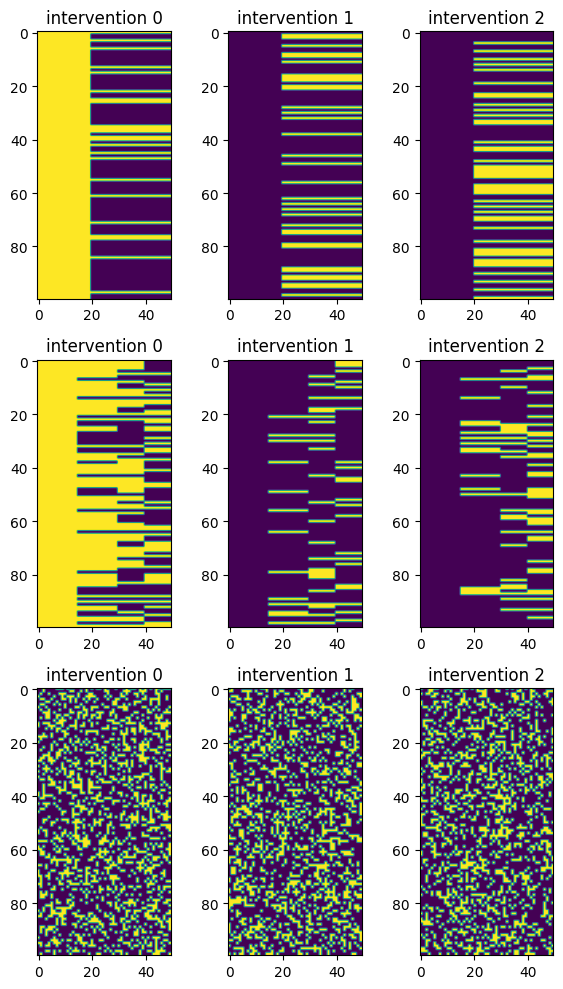

In [16]:
fig, axes = plt.subplots(3,3, figsize = (6,10))
for k, data_gen in enumerate(datasets_generators[:]):
    data = data_gen()
    mask = data.mask
    for i in range(3):
        axes[k, i].imshow(mask[:,:,i,0])
        axes[k, i].set_title(f"intervention {i}")
plt.tight_layout()

# Run experiment

In [33]:
algorithm = "SNN"
repeat = 1

# init df
res_df = pd.DataFrame(columns = ["data name", "train_time (sec)", "query_time (ms)", "R2", "RMSE", "number of estimated entries"])


for k, data_gen in enumerate(datasets_generators):
    (
            train_time,
            query_time,
            r2,
            mse,
            number_estimated_entries,
        ) = evaluate(data_gen, algorithm, repeat)
    print(f"Evaluate SNN for {data_names[k]}")
    print(f"Train time: \t {train_time.mean()}")
    print(f"query time: \t {query_time.mean()}")
    print(f"R2: \t {r2.mean()}")
    print(f"RMSE: \t {np.sqrt(mse.mean())}")
    print(f"number of retrieved entries: \t {number_estimated_entries.mean()}")
    print("="*10)
    res_df.loc[k] = [data_names[k], train_time.mean(), query_time.mean(), r2.mean(), np.sqrt(mse.mean()),  number_estimated_entries.mean()]

    # make sure you clear cache
    

    

Evaluate SNN for SI sparsity
Train time: 	 2.168023723999795
query time: 	 0.0012414800003170967
R2: 	 0.9772143668560385
RMSE: 	 2812.914896036818
number of retrieved entries: 	 6000.0
Evaluate SNN for staggered
Train time: 	 5.384043300997291
query time: 	 0.0006793970023863949
R2: 	 0.7874578986785521
RMSE: 	 8726.006224429144
number of retrieved entries: 	 7000.0


In [34]:
res_df

,data name,train_time (sec),query_time (ms),R2,RMSE,number of estimated entries
0,SI sparsity,2.168024,0.001241,0.977214,2812.914896,6000.0
1,staggered,5.384043,0.000679,0.787458,8726.006224,7000.0
